<a href="https://www.kaggle.com/code/nithishkumarsj23/india-summer-eda-prediction?scriptVersionId=94231341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
summer_data = pd.read_csv('../input/indian-summer/indian_summer.csv')

In [3]:
summer_data.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,01-04-2021,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,01-04-2021 6:11,01-04-2021 18:39,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,02-04-2021,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,02-04-2021 6:10,02-04-2021 18:39,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,03-04-2021,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,03-04-2021 6:08,03-04-2021 18:40,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,04-04-2021,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,04-04-2021 6:07,04-04-2021 18:40,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,05-04-2021,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,05-04-2021 6:06,05-04-2021 18:41,0.81,Partially cloudy,Partly cloudy throughout the day.


In [4]:
summer_data.tail()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
13645,Hyderabad,26-06-2012,32.1,22.1,25.8,35.9,22.1,26.7,19.9,71.60,31.3,248.8,NaN,85.3,4.6,26-06-2012 05:44,26-06-2012 18:53,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
13646,Hyderabad,27-06-2012,31.8,21.1,25.5,33.3,21.1,26.1,19.0,68.40,29.5,262.4,NaN,67.9,5.5,27-06-2012 05:44,27-06-2012 18:54,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
13647,Hyderabad,28-06-2012,31.8,23.1,26.8,33.3,23.1,27.6,19.1,63.67,31.3,264.5,NaN,69.5,5.6,28-06-2012 05:44,28-06-2012 18:54,0.33,Partially cloudy,Partly cloudy throughout the day.
13648,Hyderabad,29-06-2012,32.8,23.1,26.7,35.1,23.1,27.5,19.5,65.54,27.7,265.1,NaN,85.0,5.6,29-06-2012 05:44,29-06-2012 18:54,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
13649,Hyderabad,30-06-2012,32.9,23.1,27.7,34.5,23.1,28.6,18.8,59.46,27.7,264.2,NaN,64.9,5.6,30-06-2012 05:45,30-06-2012 18:54,0.43,Partially cloudy,Partly cloudy throughout the day.


In [5]:
(summer_data.shape),(summer_data.size),(summer_data.columns),(summer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13650 non-null  object 
 1   Date              13650 non-null  object 
 2   tempmax           13615 non-null  float64
 3   tempmin           13615 non-null  float64
 4   temp              13605 non-null  float64
 5   feelslikemax      13614 non-null  float64
 6   feelslikemin      13614 non-null  float64
 7   feelslike         13604 non-null  float64
 8   dew               13605 non-null  float64
 9   humidity          13605 non-null  float64
 10  windspeed         13605 non-null  float64
 11  winddir           13600 non-null  float64
 12  sealevelpressure  10631 non-null  float64
 13  cloudcover        13605 non-null  float64
 14  visibility        13605 non-null  float64
 15  sunrise           13650 non-null  object 
 16  sunset            13650 non-null  object

((13650, 20),
 273000,
 Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
        'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
        'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
        'moonphase', 'conditions', 'description'],
       dtype='object'),
 None)

In [6]:
summer_data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
count,13615.000000,13615.000000,13605.000000,13614.000000,13614.000000,13604.000000,13605.000000,13605.000000,13605.000000,13600.000000,10631.000000,13605.000000,13605.000000,13650.000000
mean,36.728248,25.821160,31.151510,40.212605,27.221324,33.704535,19.049607,54.638537,20.078552,205.236559,1004.302446,37.120235,4.666645,0.500692
std,4.115452,3.212167,3.074874,5.389016,4.907125,4.666616,5.966341,19.521510,9.886468,64.181345,4.183785,24.684504,1.382413,0.308204
min,0.000000,0.000000,19.900000,0.000000,0.000000,19.900000,-10.300000,7.410000,0.000000,0.000000,908.500000,0.000000,1.300000,0.000000
25%,34.000000,23.700000,29.200000,36.500000,23.700000,30.200000,15.000000,38.190000,14.800000,159.800000,1001.600000,16.700000,3.700000,0.250000
50%,37.000000,26.000000,31.100000,40.000000,26.000000,33.500000,20.300000,56.120000,19.500000,218.300000,1004.700000,36.700000,4.300000,0.500000
75%,39.800000,28.100000,33.200000,43.700000,31.100000,37.200000,24.000000,71.410000,24.100000,258.625000,1007.300000,54.000000,5.600000,0.760000
max,50.000000,37.000000,40.500000,79.200000,43.300000,48.500000,29.100000,99.040000,263.200000,360.000000,1026.200000,100.000000,12.300000,1.000000


In [7]:
summer_data.isnull().sum()

City                   0
Date                   0
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
dtype: int64

In [8]:
summer_data = summer_data.drop(['sealevelpressure'], axis = 1)

In [9]:
summer_data.columns

Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description'],
      dtype='object')

In [10]:
summer_data.dropna(inplace = True)

In [11]:
summer_data.shape

(13599, 19)

In [12]:
summer_data['conditions'].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Overcast', 'Rain'], dtype=object)

In [13]:
summer_data['conditions'].value_counts()


Partially cloudy          7852
Clear                     3880
Rain, Partially cloudy    1609
Rain, Overcast             136
Overcast                   113
Rain                         9
Name: conditions, dtype: int64

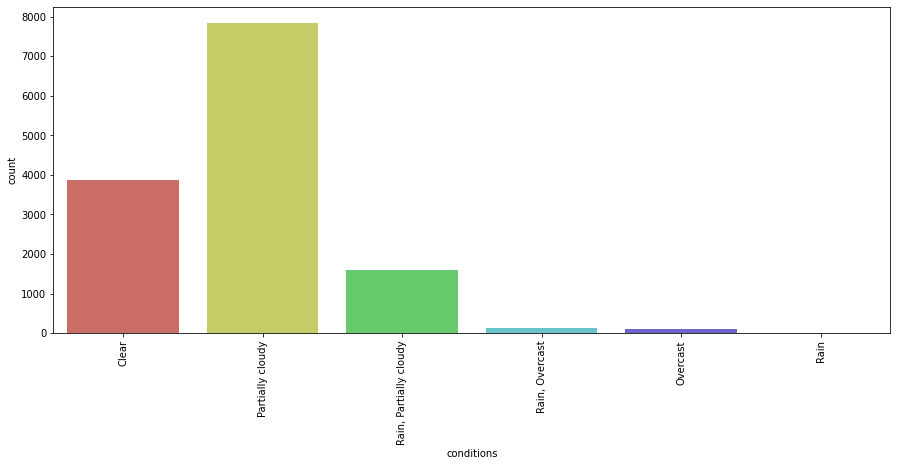

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('conditions', data = summer_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [15]:
summer_data[["humidity","tempmax","tempmin","windspeed"]].describe()

,humidity,tempmax,tempmin,windspeed
count,13599.000000,13599.000000,13599.000000,13599.000000
mean,54.643784,36.756828,25.837937,20.083293
std,19.519355,3.993890,3.133552,9.885514
min,7.410000,19.900000,10.000000,0.000000
25%,38.195000,34.000000,23.700000,14.800000
50%,56.120000,37.000000,26.000000,19.500000
75%,71.420000,39.800000,28.100000,24.100000
max,99.040000,50.000000,37.000000,263.200000


<AxesSubplot:xlabel='windspeed', ylabel='Count'>

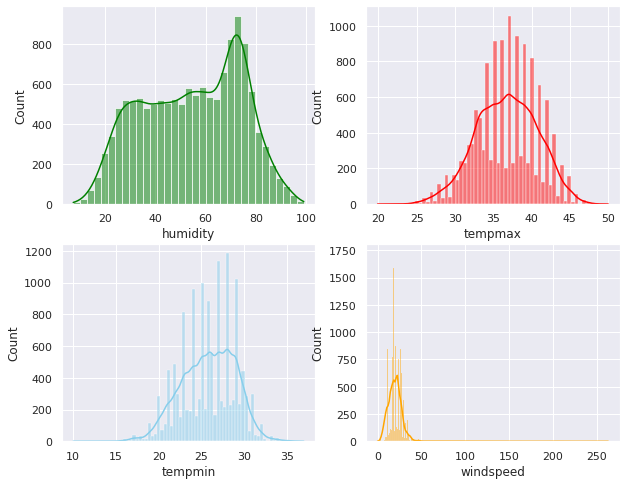

In [16]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=summer_data,x="humidity",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=summer_data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=summer_data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=summer_data,x="windspeed",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:xlabel='windspeed'>

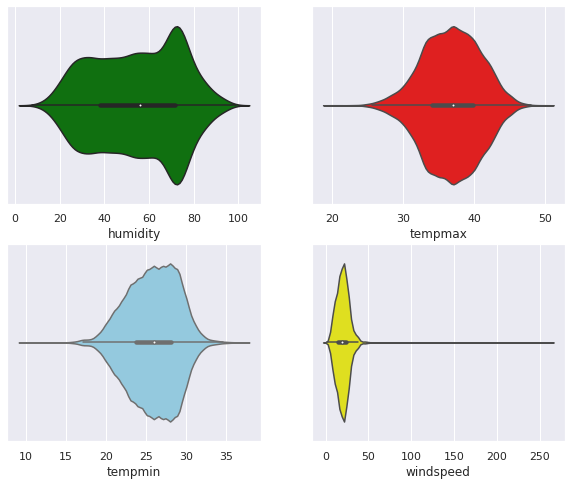

In [17]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=summer_data,x="humidity",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=summer_data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=summer_data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=summer_data,x="windspeed",kde=True,ax=axs[1,1],color='yellow')

<AxesSubplot:xlabel='humidity', ylabel='conditions'>

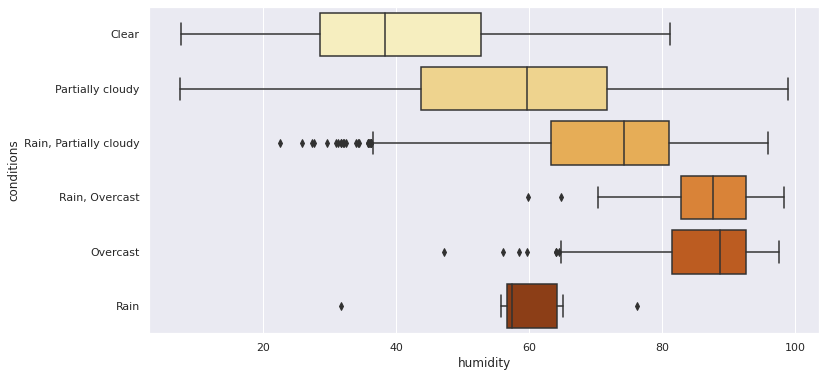

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot("humidity","conditions",data=summer_data,palette="YlOrBr")

<AxesSubplot:xlabel='tempmax', ylabel='conditions'>

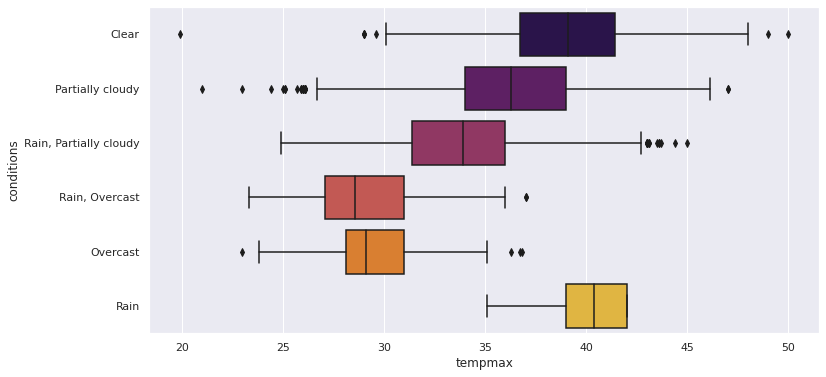

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmax","conditions",data=summer_data,palette="inferno")

<AxesSubplot:xlabel='windspeed', ylabel='conditions'>

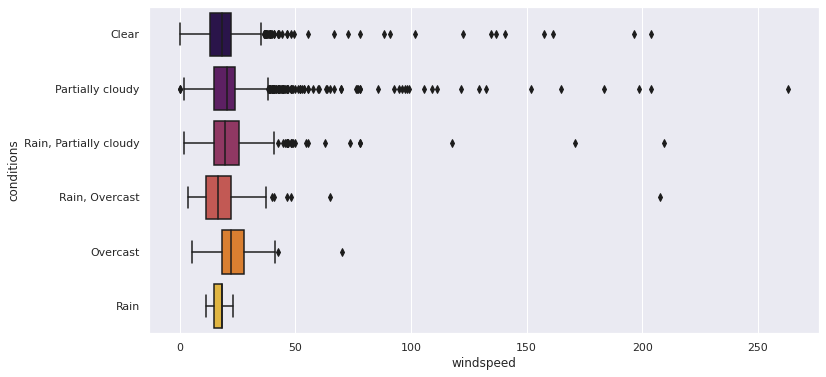

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot("windspeed","conditions",data=summer_data,palette="inferno")

<AxesSubplot:xlabel='tempmin', ylabel='conditions'>

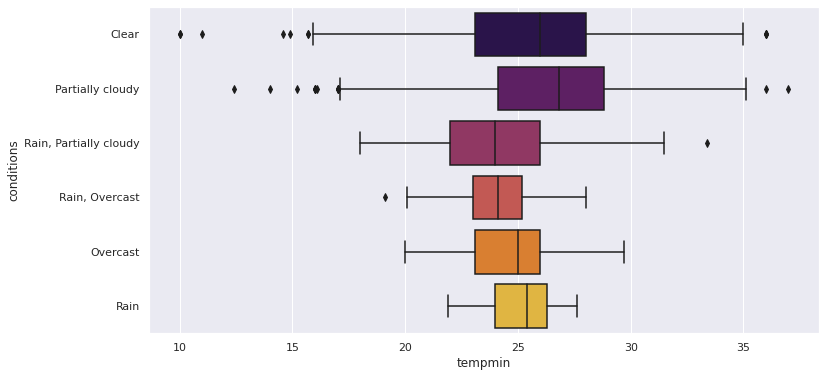

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmin","conditions",data=summer_data,palette="inferno")

<AxesSubplot:>

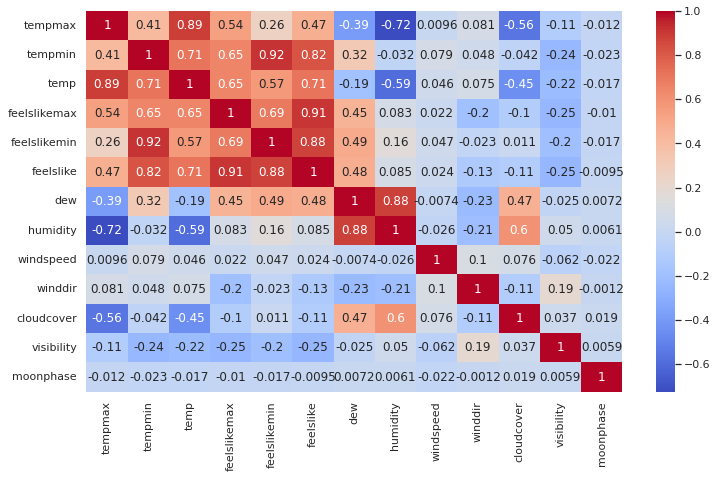

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(summer_data.corr(),annot=True,cmap='coolwarm')

In [23]:
df=summer_data.drop(['Date', 'sunrise', 'sunset', 'description'],axis=1)

In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [25]:
df.humidity=np.sqrt(df.humidity)
df.windspeed=np.sqrt(df.windspeed)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

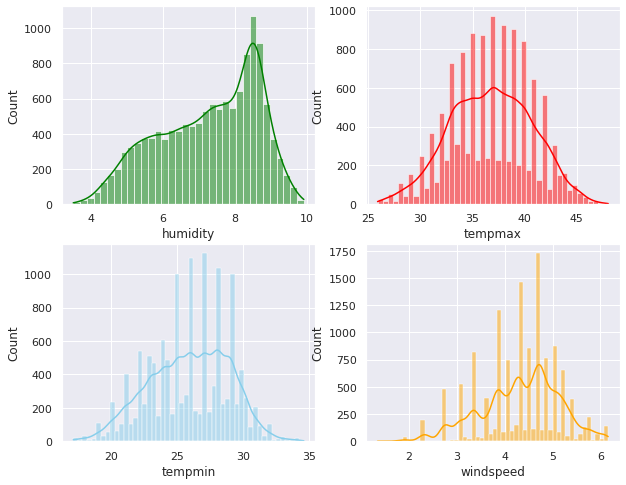

In [26]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="humidity",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="windspeed",kde=True,ax=axs[1,1],color='orange')

In [27]:
df.head()


,City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
0,New Delhi,34.0,19.0,27.1,31.6,19.0,26.1,3.1,4.753946,4.774935,272.9,0.0,3.1,0.60,Clear
4,New Delhi,38.8,21.0,29.9,37.1,21.0,28.9,8.1,5.371220,3.674235,100.4,38.4,3.1,0.81,Partially cloudy
5,New Delhi,38.0,22.6,30.4,37.2,22.6,29.5,10.2,5.523586,3.847077,102.0,30.7,2.4,0.86,Partially cloudy
6,New Delhi,36.0,23.4,29.6,34.6,23.4,28.7,9.7,5.629387,4.289522,220.8,24.1,2.7,0.91,Partially cloudy
7,New Delhi,34.9,20.9,27.6,32.6,20.9,26.7,4.4,5.144900,3.987480,259.7,0.0,3.2,0.94,Clear


In [28]:
df1 = df.drop(['City'], axis = 1)

In [29]:
df1.head()


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
0,34.0,19.0,27.1,31.6,19.0,26.1,3.1,4.753946,4.774935,272.9,0.0,3.1,0.60,Clear
4,38.8,21.0,29.9,37.1,21.0,28.9,8.1,5.371220,3.674235,100.4,38.4,3.1,0.81,Partially cloudy
5,38.0,22.6,30.4,37.2,22.6,29.5,10.2,5.523586,3.847077,102.0,30.7,2.4,0.86,Partially cloudy
6,36.0,23.4,29.6,34.6,23.4,28.7,9.7,5.629387,4.289522,220.8,24.1,2.7,0.91,Partially cloudy
7,34.9,20.9,27.6,32.6,20.9,26.7,4.4,5.144900,3.987480,259.7,0.0,3.2,0.94,Clear
